In [4]:
import pandas as pd
import numpy as np
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import datapane as dp 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline() # Use Plotly locally

pd.set_option('display.max_columns', 150) #Jupyter notebook displays 150 columns
pd.set_option('display.max_rows', 150) #Jupyter notebook displays 150 rows

In [5]:
op_train_df = pd.read_csv('order_products__train.csv') # (1,384,617, 4)
op_prior_df = pd.read_csv('order_products__prior.csv') # (32,434,489, 4)

orders_df = pd.read_csv('orders.csv') # (3,421,083, 7)
products_df = pd.read_csv('products.csv') # (49,688, 4)

aisles_df = pd.read_csv('aisles.csv') # (134, 2)
departments_df = pd.read_csv('departments.csv') # (21, 2)

In [6]:
df_list = [op_train_df,op_prior_df,orders_df,products_df,aisles_df,departments_df]

for df in df_list:
    print(df.shape)

(1384617, 4)
(32434489, 4)
(3421083, 7)
(49688, 4)
(134, 2)
(21, 2)


In [7]:
frames = [op_prior_df, op_train_df]
big_df = pd.concat(frames)

In [8]:
bigger_df = pd.merge(left=big_df, right=products_df, how='inner')

In [9]:
biggest_df = pd.merge(left=bigger_df, right=aisles_df, on='aisle_id')

In [10]:
giant_df = pd.merge(left=biggest_df, right=departments_df,on='department_id')

In [11]:
giant_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,eggs,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,eggs,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,eggs,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,eggs,dairy eggs


In [12]:
 giant_df.shape

(33819106, 9)

In [13]:
aisles = giant_df['aisle'].value_counts()
aisles = dict(aisles)

fig = go.Figure()

fig.add_trace(go.Bar(
    y= list(aisles.keys())[0:20],
    x= list(aisles.values())[0:20],
    orientation='h',
    marker_color='RoyalBlue',
    text=list(aisles.values())[0:20])
             )


fig.update_traces(textposition='outside')


fig.update_layout(title_text="<b>Top 20 Aisles by No. of Products Sold</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.57,
                 title_y=0.90,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Count',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Aisle',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        nticks = 20,
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)

In [14]:
report = dp.Report(
  dp.Text('Top 20 Aisles by No. of Products Sold'),
  dp.Plot(fig, caption="Interactive plot generated with `plotly`")
)

report.save("Top 20 Aisles by No. of Products Sold.html", open=True)
report.publish(name='Top 20 Aisles by No. of Products Sold', visibility=dp.Visibility.PUBLIC)

Thanks for using **Datapane**, to automate and securely share documents in your organization please see [Datapane Teams](https://datapane.com/)

Publishing document and associated data - *please wait...*

Report successfully published at https://datapane.com/u/vijayv500/reports/top-20-aisles-by-no-of-products-sold/ - you can edit and add additional text online

In [15]:
departments = giant_df['department'].value_counts()
departments = dict(departments)

fig = go.Figure()

fig.add_trace(go.Bar(
    y= list(departments.keys()),
    x= list(departments.values()),
    orientation='h',
    name='Departments by Products Sold',
    marker_color='RoyalBlue',
    text=list(departments.values()))
             )


fig.update_traces(textposition='outside')


fig.update_layout(title_text="<b>Departments by No. of Products Sold</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.57,
                 title_y=0.90,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Count',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Department',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        nticks = 20,
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)

In [16]:
report = dp.Report(
  dp.Text('Departments by No. of Products Sold'),
  dp.Plot(fig, caption="Interactive plot generated with `plotly`")
)

report.save("Departments by No. of Products Sold.html", open=True)
report.publish(name='Departments by No. of Products Sold', visibility=dp.Visibility.PUBLIC)

Publishing document and associated data - *please wait...*

Report successfully published at https://datapane.com/u/vijayv500/reports/departments-by-no-of-products-sold/ - you can edit and add additional text online

In [17]:
products = giant_df['product_name'].value_counts()
products = dict(products)

product = list(products.keys())
frequency = list(products.values())


fig = go.Figure()

fig.add_trace(go.Bar(
    y= product[0:20],
    x= frequency[0:20],
    orientation='h',
    name='Top 20 Products by Frequency',
    marker_color='RoyalBlue',
    text=frequency)
             )
fig.update_traces(textposition='outside')


fig.update_layout(title_text="<b>Top 20 Products by Order Count</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.57,
                 title_y=0.90,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='No. of Times Ordered',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        nticks=20,
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Products',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        nticks = 20,
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True) 

In [18]:
report = dp.Report(
  dp.Text('Top 20 Products by Order Count'),
  dp.Plot(fig, caption="Interactive plot generated with `plotly`")
)

report.save("Top 20 Products by Order Count.html", open=True)
report.publish(name='Top 20 Products by Order Count', visibility=dp.Visibility.PUBLIC)

Publishing document and associated data - *please wait...*

Report successfully published at https://datapane.com/u/vijayv500/reports/top-20-products-by-order-count/ - you can edit and add additional text online

In [19]:
orderid_grp = giant_df.groupby('order_id')['add_to_cart_order'].aggregate('max').reset_index()

In [20]:
add_cart = orderid_grp['add_to_cart_order'].value_counts()
add_cart = dict(add_cart)

fig = go.Figure()

fig.add_trace(go.Bar(
    x= list(add_cart.keys()),
    y= list(add_cart.values()),
    name='Maximum Order Count',
    marker_color='RoyalBlue')
             )

fig.update_layout(title_text="<b>No. of Products in Order Baskets</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.5,
                 title_y=0.90,
                 title_xanchor='center',
                 title_yanchor='top'
                 )

fig.update_xaxes(
        color='teal',
        title_text='No. of Products in a Given Order Basket',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Count',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        linecolor='red',
        linewidth=3,
        mirror = True) 

In [21]:
report = dp.Report(
  dp.Text('No. of Products in Order Baskets'),
  dp.Plot(fig, caption="Interactive plot generated with `plotly`")
)

report.save("No. of Products in Order Baskets.html", open=True)
report.publish(name='No. of Products in Order Baskets', visibility=dp.Visibility.PUBLIC)

Publishing document and associated data - *please wait...*

Report successfully published at https://datapane.com/u/vijayv500/reports/no-of-products-in-order-baskets/ - you can edit and add additional text online

In [22]:
aisles_grp = giant_df.groupby('aisle')['reordered'].aggregate('mean').reset_index()
aisles_grp.sort_values(by='reordered',ascending=False,inplace=True)

In [23]:
fig = go.Figure()

fig.add_trace(go.Bar(
    y= aisles_grp['aisle'].tolist()[0:20],
    x= aisles_grp['reordered'].tolist()[0:20],
    orientation='h',
    marker_color='RoyalBlue'
             ))

fig.update_layout(title_text="<b>Top 20 Aisles by Re-order Ratio</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.57,
                 title_y=0.90,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Re-order Ratio',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Aisle',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        nticks = 20,
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)

In [24]:
report = dp.Report(
  dp.Text('Top 20 Aisles by Re-order Ratio'),
  dp.Plot(fig, caption="Interactive plot generated with `plotly`")
)

report.save("Top 20 Aisles by Re-order Ratio.html", open=True)
report.publish(name='Top 20 Aisles by Re-order Ratio', visibility=dp.Visibility.PUBLIC)

Publishing document and associated data - *please wait...*

Report successfully published at https://datapane.com/u/vijayv500/reports/top-20-aisles-by-re-order-ratio/ - you can edit and add additional text online

In [25]:
dept_grp = giant_df.groupby('department')['reordered'].aggregate('mean').reset_index()

In [26]:
fig = go.Figure() 

fig.add_trace(go.Scatter(x=dept_grp['department'].tolist(), y=dept_grp['reordered'].tolist(),
                         line = dict(color='OrangeRed'),
                    mode='lines+markers'))


fig.update_layout(title_text="<b>Department-wise Reorder Ratio</b>",
                 title_font_size=25,
                 title_font_color='RoyalBlue',
                 title_font_family='Titillium Web',
                 title_x=0.5,
                 title_y=0.87,
                 title_xanchor='center',
                 title_yanchor='top')

fig.update_xaxes(
        color='ForestGreen',
        title_text='Department',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='teal',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        nticks=36,
        linecolor='black',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Reorder Ratio',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='Teal',
        title_standoff = 15,
        tickfont_family='Arial',
        gridcolor='lightblue',
        linecolor='black',
        linewidth=3,
        mirror=True) 

In [27]:
report = dp.Report(
  dp.Text('Department-wise Reorder Ratio'),
  dp.Plot(fig, caption="Interactive plot generated with `plotly`")
)

report.save("Department-wise Reorder Ratio.html", open=True)
report.publish(name='Department-wise Reorder Ratio', visibility=dp.Visibility.PUBLIC)

Publishing document and associated data - *please wait...*

Report successfully published at https://datapane.com/u/vijayv500/reports/department-wise-reorder-ratio/ - you can edit and add additional text online

In [28]:
addcart_grp = giant_df.groupby('add_to_cart_order')['reordered'].aggregate('mean').reset_index()

In [29]:
fig = go.Figure() 

fig.add_trace(go.Scatter(x=addcart_grp['add_to_cart_order'].tolist(), y=addcart_grp['reordered'].tolist(),
                         line = dict(color='OrangeRed'),
                    mode='lines+markers'))


fig.update_layout(title_text="<b>Add-to-Cart-Number - Reorder Ratio</b>",
                 title_font_size=25,
                 title_font_color='RoyalBlue',
                 title_font_family='Titillium Web',
                 title_x=0.5,
                 title_y=0.87,
                 title_xanchor='center',
                 title_yanchor='top')

fig.update_xaxes(
        color='ForestGreen',
        title_text='Add to Cart Number',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='teal',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        nticks=36,
        linecolor='black',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Reorder Ratio',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='Teal',
        title_standoff = 15,
        tickfont_family='Arial',
        gridcolor='lightblue',
        linecolor='black',
        linewidth=3,
        mirror=True) 

In [30]:
report = dp.Report(
  dp.Text('Add-to-Cart-Number - Reorder Ratio'),
  dp.Plot(fig, caption="Interactive plot generated with `plotly`")
)

report.save("Add-to-Cart-Number - Reorder Ratio.html", open=True)
report.publish(name='Add-to-Cart-Number - Reorder Ratio', visibility=dp.Visibility.PUBLIC)

Publishing document and associated data - *please wait...*

Report successfully published at https://datapane.com/u/vijayv500/reports/add-to-cart-number-reorder-ratio/ - you can edit and add additional text online

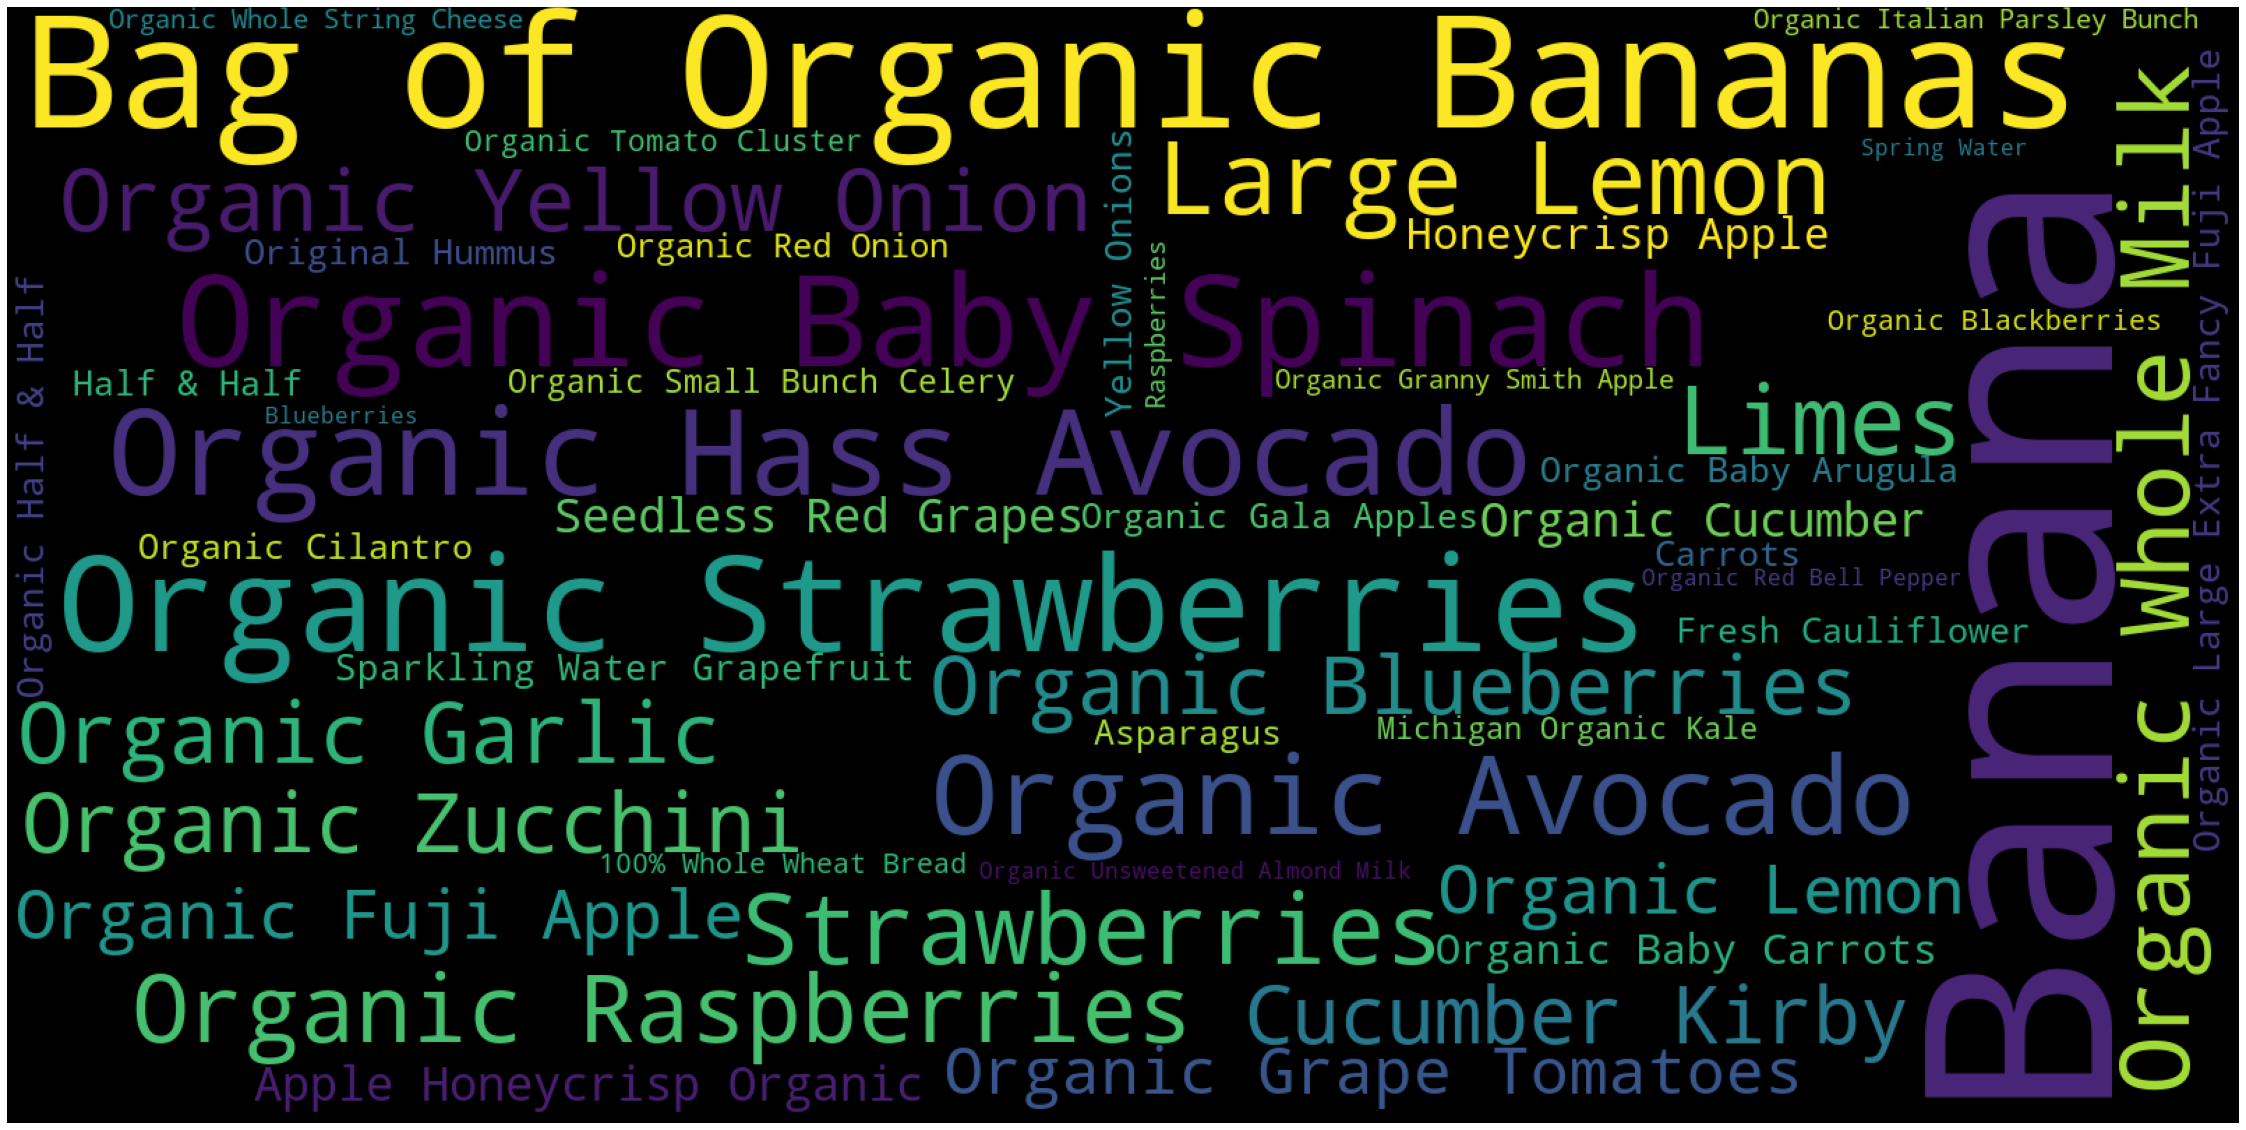

In [31]:
prods = giant_df['product_name'].values.tolist()
count = Counter(prods)
wordcloud = WordCloud(width = 1600, height = 800,max_words=50,background_color='black')\
.generate_from_frequencies(count)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 

In [32]:
monolith_df = pd.merge(left=giant_df, right=orders_df,how='inner',on='order_id')

In [33]:
monolith_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,17794,6,1,Carrots,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
3,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce,202279,prior,3,5,9,8.0
4,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0


In [35]:
depart_grp = monolith_df.groupby(['department','order_dow']).aggregate({'order_id':'count'}).reset_index()

In [36]:
depart_grp = depart_grp.pivot('order_dow','department','order_id')

In [37]:
fig = go.Figure(data=go.Heatmap(
        z=depart_grp.values.tolist(),
        x=depart_grp.columns.tolist(),
        y=depart_grp.index.tolist(),
        colorscale='algae'))

fig.update_layout(title_text="<b>Heatmap: Department vs Day of Week vs Order Count</b>",
                 title_font_size=25,
                 title_font_color='RoyalBlue',
                 title_font_family='Titillium Web',
                 title_x=0.5,
                 title_y=0.87,
                 title_xanchor='center',
                 title_yanchor='top')

fig.update_xaxes(
        color='RoyalBlue',
        title_text='Department',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror='allticks')

fig.update_yaxes(
        color='RoyalBlue',
        title_text='Day of Week',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        linecolor='red',
        linewidth=3,
        mirror='allticks') 

In [38]:
report = dp.Report(
  dp.Text('Heatmap: Department vs Day of Week vs Order Count'),
  dp.Plot(fig, caption="Interactive plot generated with `plotly`")
)

report.save("Heatmap: Department vs Day of Week vs Order Count.html", open=True)
report.publish(name='Heatmap: Department vs Day of Week vs Order Count', visibility=dp.Visibility.PUBLIC)

Publishing document and associated data - *please wait...*

Report successfully published at https://datapane.com/u/vijayv500/reports/heatmap-department-vs-day-of-week-vs-order-count/ - you can edit and add additional text online